**TrueFoundry** **Assignment**

In [1]:
! pip install --user scipy wordcloud nltk seaborn textblob

You should consider upgrading via the 'C:\Users\mrity\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
nltk.download('wordnet') 
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mrity\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mrity\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
airline_dataset = pd.read_csv("airline_sentiment_analysis.csv")

In [4]:
airline_dataset

,Unnamed: 0,airline_sentiment,text
0,1,positive,@VirginAmerica plus you've added commercials t...
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
...,...,...,...
11536,14633,negative,@AmericanAir my flight was Cancelled Flightled...
11537,14634,negative,@AmericanAir right on cue with the delays👌
11538,14635,positive,@AmericanAir thank you we got on a different f...
11539,14636,negative,@AmericanAir leaving over 20 minutes Late Flig...


In [5]:
airline_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11541 entries, 0 to 11540
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         11541 non-null  int64 
 1   airline_sentiment  11541 non-null  object
 2   text               11541 non-null  object
dtypes: int64(1), object(2)
memory usage: 270.6+ KB


In [6]:
air_sentiment = airline_dataset.columns.values[1]
air_text = airline_dataset.columns.values[2]

print(type(air_text))

<class 'str'>


In [7]:
print(air_text)
print(air_sentiment)

text
airline_sentiment


In [8]:
import json
with open('contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict['contractions']


In [9]:
import re

def emoji(air_text):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    air_text = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', air_text)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    air_text = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', air_text)
    # Love -- <3, :*
    air_text = re.sub(r'(<3|:\*)', ' positiveemoji ', air_text)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    air_text = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', air_text)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    air_text = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', air_text)
    # Cry -- :,(, :'(, :"(
    air_text = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', air_text)

    return air_text

In [10]:
def process_text(air_text):
    air_text = air_text.lower()                                             # Lowercases the string
    air_text = re.sub('@[^\s]+', '', air_text)                              # Removes usernames
    air_text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', air_text)   # Remove URLs
    air_text = re.sub(r"\d+", " ", str(air_text))                           # Removes all digits
    air_text = re.sub('&quot;'," ", air_text)                               # Remove special characters 
    air_text = emoji(air_text)                                              # Replaces Emojis
    air_text = re.sub(r"\b[a-zA-Z]\b", "", str(air_text))                   # Removes all single characters
    for word in air_text.split():
        if word.lower() in contractions:
            air_text = air_text.replace(word, contractions[word.lower()])   # Replaces contractions
    air_text = re.sub(r"[^\w\s]", " ", str(air_text))                       # Removes all punctuations
    air_text = re.sub(r'(.)\1+', r'\1\1', air_text)                         # Convert more than 2 letter repetitions to 2 letter
    air_text = re.sub(r"\s+", " ", str(air_text))                           # Replaces double spaces with single space    
    return air_text

In [11]:
airline_dataset['process_text'] = np.vectorize(process_text)(airline_dataset[air_text])

In [12]:
pd.set_option("display.max_colwidth", None) # To display non truncated values
airline_dataset.head()

,Unnamed: 0,airline_sentiment,text,process_text
0,1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,plus you have added commercials to the experience tacky
1,3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
2,4,negative,@VirginAmerica and it's a really big bad thing about it,and it really big bad thing about it
3,5,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,seriously would pay flight for seats that didn have this playing it really the only bad thing about flying va
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",yes nearly every time fly vx this ear worm won go away positiveemoji


In [13]:
tokenized_text = airline_dataset['process_text'].apply(lambda x: x.split())
tokenized_text.head()

0                                                                     [plus, you, have, added, commercials, to, the, experience, tacky]
1             [it, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, amp, they, have, little, recourse]
2                                                                                         [and, it, really, big, bad, thing, about, it]
3    [seriously, would, pay, flight, for, seats, that, didn, have, this, playing, it, really, the, only, bad, thing, about, flying, va]
4                                                    [yes, nearly, every, time, fly, vx, this, ear, worm, won, go, away, positiveemoji]
Name: process_text, dtype: object

In [14]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

tokenized_text = tokenized_text.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_text.head()

0                                                                     [plus, you, have, added, commercial, to, the, experience, tacky]
1              [it, really, aggressive, to, blast, obnoxious, entertainment, in, your, guest, face, amp, they, have, little, recourse]
2                                                                                        [and, it, really, big, bad, thing, about, it]
3    [seriously, would, pay, flight, for, seat, that, didn, have, this, playing, it, really, the, only, bad, thing, about, flying, va]
4                                                   [yes, nearly, every, time, fly, vx, this, ear, worm, won, go, away, positiveemoji]
Name: process_text, dtype: object

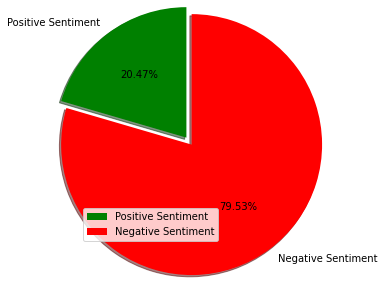

In [15]:
airline_sentiments = ['Positive Sentiment', 'Negative Sentiment'] 
slices = [(airline_dataset[air_sentiment] != "negative").sum(), (airline_dataset[air_sentiment] == "negative").sum()] 
colors = ['g', 'r'] 
plt.pie(slices, labels = airline_sentiments, colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), radius = 1.5, autopct = '%1.2f%%') 
plt.legend()
plt.show() 

<Figure size 3600x2400 with 0 Axes>

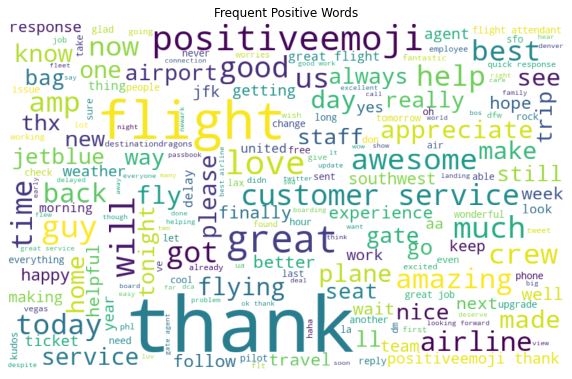

In [16]:
positive_words =' '.join([text for text in airline_dataset['process_text'][airline_dataset[air_sentiment] == "positive"]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(positive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Frequent Positive Words")
plt.show()

<Figure size 3600x2400 with 0 Axes>

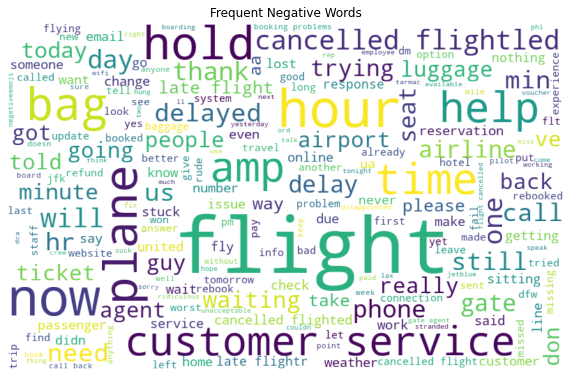

In [17]:
negative_words =' '.join([text for text in airline_dataset['process_text'][airline_dataset[air_sentiment] == "negative"]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(negative_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Frequent Negative Words")
plt.show()

In [18]:
X = airline_dataset.iloc[:, -3].values
y = airline_dataset.iloc[:, -1].values.reshape(11541)

In [19]:
print(X)

['positive' 'negative' 'negative' ... 'positive' 'negative' 'negative']


In [20]:
print(y)

[' plus you have added commercials to the experience tacky '
 ' it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse'
 ' and it really big bad thing about it' ...
 ' thank you we got on different flight to chicago '
 ' leaving over minutes late flight no warnings or communication until we were minutes late flight that called shitty customer svc'
 ' you have my money you change my flight and don answer your phones any other suggestions so can make my commitment ']


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tf_idf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,3))
final_vectorized_data = tf_idf_vectorizer.fit_transform(airline_dataset['process_text'])

final_vectorized_data

<11541x220527 sparse matrix of type '<class 'numpy.float64'>'
	with 513647 stored elements in Compressed Sparse Row format>

In [22]:
final_vectorized_data
print(type(final_vectorized_data))
print(final_vectorized_data)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 175530)	0.2470566103597271
  (0, 190297)	0.2470566103597271
  (0, 39300)	0.2470566103597271
  (0, 1856)	0.2470566103597271
  (0, 81059)	0.2470566103597271
  (0, 216975)	0.2470566103597271
  (0, 144243)	0.2470566103597271
  (0, 57910)	0.2470566103597271
  (0, 175525)	0.20123481967929335
  (0, 190241)	0.12287288947816148
  (0, 39299)	0.2470566103597271
  (0, 1855)	0.2470566103597271
  (0, 81058)	0.2470566103597271
  (0, 216973)	0.1284059304356734
  (0, 144241)	0.22362373176221767
  (0, 169719)	0.2470566103597271
  (0, 57754)	0.13006465218647095
  (0, 174169)	0.052770037438050775
  (0, 185286)	0.046486025279230854
  (0, 39294)	0.2189611080365327
  (0, 1852)	0.19552822943902326
  (0, 81053)	0.0797602956815857
  (0, 215684)	0.059869574883208904
  (0, 144166)	0.16578224296481464
  (1, 81704)	0.17074532416728938
  :	:
  (11540, 33488)	0.1320394491243066
  (11540, 10373)	0.12707124554276358
  (11540, 110292)	0.08366098035349032
  (11540, 116564)	0.10

In [23]:
airline_dataset

,Unnamed: 0,airline_sentiment,text,process_text
0,1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,plus you have added commercials to the experience tacky
1,3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
2,4,negative,@VirginAmerica and it's a really big bad thing about it,and it really big bad thing about it
3,5,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,seriously would pay flight for seats that didn have this playing it really the only bad thing about flying va
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",yes nearly every time fly vx this ear worm won go away positiveemoji
...,...,...,...,...
11536,14633,negative,"@AmericanAir my flight was Cancelled Flightled, leaving tomorrow morning. Auto rebooked for a Tuesday night flight but need to arrive Monday.",my flight was cancelled flightled leaving tomorrow morning auto rebooked for tuesday night flight but need to arrive monday
11537,14634,negative,@AmericanAir right on cue with the delays👌,right on cue with the delays
11538,14635,positive,@AmericanAir thank you we got on a different flight to Chicago.,thank you we got on different flight to chicago
11539,14636,negative,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,leaving over minutes late flight no warnings or communication until we were minutes late flight that called shitty customer svc


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, airline_dataset[air_sentiment],test_size=0.25, random_state=1)  

In [25]:
# from sklearn.linear_model import LogisticRegression


# project_model = LogisticRegression(random_state = 0)

# project_model.fit(X_train, y_train)
# predicted_model = project_model.predict(X_test)

In [26]:
# from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

# project_model = MultinomialNB().fit(X_train, y_train) 
# predicted_model = project_model.predict(X_test)

In [27]:
# from sklearn.tree import DecisionTreeClassifier
# project_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# project_model.fit(X_train, y_train)
# predicted_model = project_model.predict(X_test)

In [28]:
# from sklearn.ensemble import RandomForestClassifier
# project_model = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', max_depth = 2, random_state = 0)
# project_model.fit(X_train, y_train)
# predicted_model = project_model.predict(X_test)

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(1, 51))
param_dict = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_dict, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [30]:
print(grid_search.best_params_)

{'n_neighbors': 13}


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_metric = ['minkowski','euclidean','manhattan','mahalanobis']
param_dict = dict(n_neighbors=k_metric)

grid = GridSearchCV(knn, param_dict, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


C:\Users\mrity\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mrity\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\mrity\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\mrity\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\mrity\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\mrity\AppData\Roaming\Python\Python39\site-packages\skl

C:\Users\mrity\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mrity\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\mrity\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\mrity\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\mrity\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\mrity\AppData\Roaming\Python\Python39\site-packages\skl

C:\Users\mrity\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mrity\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\mrity\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\mrity\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\mrity\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\mrity\AppData\Roaming\Python\Python39\site-packages\skl

In [32]:
print(grid_search.best_params_)

{'n_neighbors': 'minkowski'}


In [33]:
from sklearn.neighbors import KNeighborsClassifier
project_model = KNeighborsClassifier(n_neighbors = 13, metric = 'minkowski', p = 2)
project_model.fit(X_train, y_train)
predicted_model = project_model.predict(X_test)

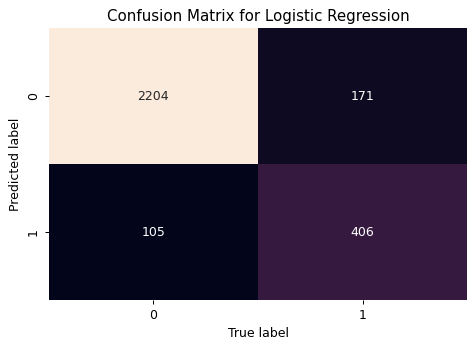

In [34]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=90)
mat = confusion_matrix(y_test, predicted_model)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [35]:
from sklearn.metrics import accuracy_score

score_model = accuracy_score(predicted_model, y_test)
print("Accuracy with this model: ",score_model)

Accuracy with this model:  0.9043659043659044


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_model))

              precision    recall  f1-score   support

    negative       0.93      0.95      0.94      2309
    positive       0.79      0.70      0.75       577

    accuracy                           0.90      2886
   macro avg       0.86      0.83      0.84      2886
weighted avg       0.90      0.90      0.90      2886



In [43]:
airline_review = """It is an amazing experience"""

review_vector = tf_idf_vectorizer.transform([airline_review])

if project_model.predict(review_vector) == "positive":
    print("Positive")
elif project_model.predict(review_vector) == "negative":
    print("Negative")

Positive


In [38]:
from joblib import dump

In [39]:
dump(final_vectorized_data,"tfidfvectorizer.joblib")
dump(project_model,"model.joblib")

['model.joblib']